In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


se pide graficar el potencial efectivo inicialmente

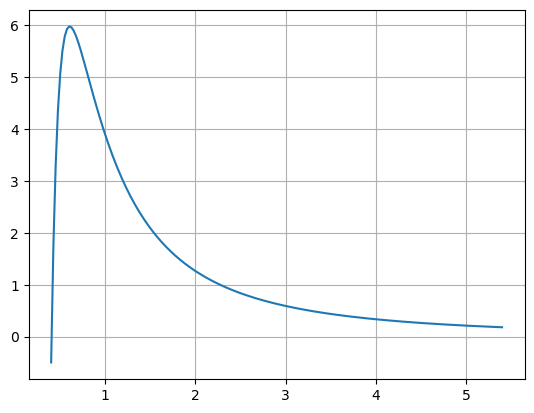

In [3]:
G = 1
c = 1
M = 0.2
r_s = 2 * G * M / c**2
l = r_s * c * np.sqrt(3) + 3

def Veff(r):
    return -G*M/r + c**4 * l**2 / (2 * r**2) - G*M*l**2 * c**2 / r**3


r = np.linspace(r_s, r_s+5, 200)
#plt.ylim(-0.3, 0.2)
plt.grid()
#plt.vlines(3 * r_s, -0.1,0.1, 'red')
plt.plot(r, Veff(r))

Orbita

utilizando integración numerica:

$$
\frac{dr}{d\tau}_{r_n, \phi_n} = \sqrt{  E^2 - (1- \frac{2M}{r_n}) \frac{L^2}{r_n^2}}
$$

$$
\frac{d \phi}{d\tau}_{r_n, \phi_n} = \frac{L}{r_n^2}
$$

In [18]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np

G = 1
c = 1
M = 0.5
r_s = 2 * G * M / c**2

b = 3.0

r_s = 2.0 * M # radio schwarchild -> 2 G M / c^2 (pero usamos unidades naturales)
L = r_s * c * np.sqrt(3) + 2
# condicion dada por el parametro de impacto en la derivacion
E2 = L / b

#functiones:
def dr_dtau(r, signo):
    return signo * np.sqrt( E2 + c**2 * r_s / r - (L**2 / r**2) * ( 1 - r_s / r)  )

def dphi_dtau(r):
    return L / r**2

def integracion_rphi(r_0, phi_0, signo, N = 100000, dtau = 0.01, max_r = 10.0):
    # comienzo del loop
    r_n = r_0
    phi_n = phi_0

    r_arr = []
    phi_arr = []

    for i in range(100000):
        r_arr.append(r_n)
        phi_arr.append(phi_n)

        # comienza la iteracion
        r_n = r_n + dtau * dr_dtau(r_n, signo)
        phi_n = phi_n + dtau * dphi_dtau(r_n)


    fig = plt.figure()
    ax = fig.add_subplot(111, projection='polar')
    # dibujamos un black hole
    angulo_bh = np.linspace(0, 2*np.pi, 100)
    linea_bh = np.array( [r_s for i in range( len(angulo_bh))] )
    ax.plot(angulo_bh, linea_bh, '-', color="black")
    ax.plot(phi_arr, r_arr, '-')
    ax.set_rlim([0, max_r])
    plt.show()

C:\Users\fbien.DESKTOP-6FMEAR7\AppData\Local\Temp\ipykernel_5252\133812806.py:19: RuntimeWarning: invalid value encountered in sqrt
  return signo * np.sqrt( E2 + c**2 * r_s / r - (L**2 / r**2) * ( 1 - r_s / r)  )


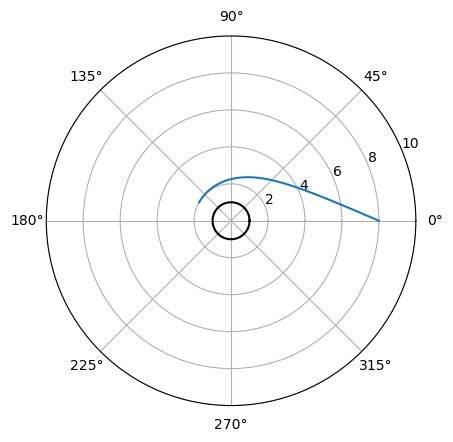

In [21]:
# desde el infinito
r_0 = 3 * r_s + 5
phi_0 = 0

integracion_rphi(r_0, phi_0, signo = -1, N = 100000, dtau = 0.05, max_r = 10.0)

si uso la ecuacion de segundo orden con mejor estabilidad numerica:

$$
\frac{d^2 r}{d \phi^2} = f(r) = 2 r^3 \frac{E^2}{L^2} + \frac{3}{2} \frac{c^2 r_s}{L^2} r^2 - r + \frac{r_s}{2}
$$

para usar Runge Kutta 4 agregamos una variable auxiliar que es simil a la velocidad
$$
v = \frac{d r}{d\phi}
$$

$$
\frac{d v}{d\phi} = f(r)
$$

In [36]:
# usando al ecs de 2do orden
from scipy.integrate import odeint

import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np

G = 1
c = 1
M = 0.5
r_s = 2 * G * M / c**2

b = 3.0

r_s = 2.0 * M # radio schwarchild -> 2 G M / c^2 (pero usamos unidades naturales)
L = r_s * c * np.sqrt(3) + 2
# condicion dada por el parametro de impacto en la derivacion
E = L / b


# defino 
def drdphi2(r):
    return 2 * r**3 * E**2 / L**2 + r**2 *(3 * c**2 * r_s)/(2 * L**2) - r + r_s / 2


In [37]:
def orbita(z,t):
    r, v = z
    dzdtheta = [v, drdphi2(r)]
    return dzdtheta

In [49]:
phi_arr = np.linspace(0, 20, 201)
z0 =[ 3*r_s, 0.0]

sol = odeint(orbita, z0, phi_arr)

c:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [50]:
r_arr = sol[:,0] # extraigo la coordenada r

In [ ]:
max_r = 10.0

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
# dibujamos un black hole
angulo_bh = np.linspace(0, 2*np.pi, 100)
linea_bh = np.array( [r_s for i in range( len(angulo_bh))] )
ax.plot(angulo_bh, linea_bh, '-', color="black")
ax.plot(phi_arr, r_arr, '-')
ax.set_rlim([0, max_r])
plt.show()